In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import dates as mpl_date
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("RAM.csv")

In [4]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [5]:
df.describe()

,Time_Elapsed,RAM_Precentage
count,162472.000000,162471.000000
mean,8235.824516,21.626763
std,4752.126699,0.743362
min,0.000585,12.600000
25%,4121.890290,21.000000
50%,8236.790036,21.700000
75%,12350.227626,22.300000
max,16467.124169,23.100000


In [6]:
dfH = []
dfm = []
dfs = []
for index, row in df.iterrows():
    timestamp = row['Time']
    H,m,s = timestamp.split(':')
    dfH.append(H)
    dfm.append(m)
    dfs.append(s)

df['H'] = dfH
df['m'] = dfm
df['s'] = dfs

print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Time,Time_Elapsed,RAM_Precentage,H,m,s
0,04:18:35,0.000585,12.6,04,18,35
1,04:18:35,0.101551,13.1,04,18,35
2,04:18:35,0.202569,13.2,04,18,35
3,04:18:35,0.303092,13.2,04,18,35
4,04:18:36,0.406815,13.2,04,18,36


In [8]:
Time = []
for index, row in df.iterrows():
    Time.append(row['H']+':'+row['m']+':'+row['s'])

newDF = pd.DataFrame()
newDF['Time'] = Time
newDF['RAM_Precentage'] = df['RAM_Precentage']
newDF['Time'] = pd.to_datetime(newDF['Time'])
newDF

<ipython-input-8-a2a4d2ff5a52>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  newDF['Time'] = pd.to_datetime(newDF['Time'])


,Time,RAM_Precentage
0,2024-06-22 04:18:35,12.6
1,2024-06-22 04:18:35,13.1
2,2024-06-22 04:18:35,13.2
3,2024-06-22 04:18:35,13.2
4,2024-06-22 04:18:36,13.2
...,...,...
162467,2024-06-22 08:53:02,22.9
162468,2024-06-22 08:53:02,22.9
162469,2024-06-22 08:53:02,22.9
162470,2024-06-22 08:53:02,22.9


In [9]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=dbcf2352aae139e29414fde4ead8f3f101f8186c838160d598c3969f81562ce9
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [10]:
from pandasql import sqldf
sql = lambda q: sqldf(q, globals())
newDF = sqldf("SELECT * FROM newDF WHERE Time BETWEEN '2024-06-22 04:18:35' AND '2024-06-22 04:19:35'")
newDF

,Time,RAM_Precentage
0,2024-06-22 04:18:35.000000,12.6
1,2024-06-22 04:18:35.000000,13.1
2,2024-06-22 04:18:35.000000,13.2
3,2024-06-22 04:18:35.000000,13.2
4,2024-06-22 04:18:36.000000,13.2
...,...,...
579,2024-06-22 04:19:34.000000,21.4
580,2024-06-22 04:19:34.000000,21.4
581,2024-06-22 04:19:34.000000,21.4
582,2024-06-22 04:19:34.000000,21.4


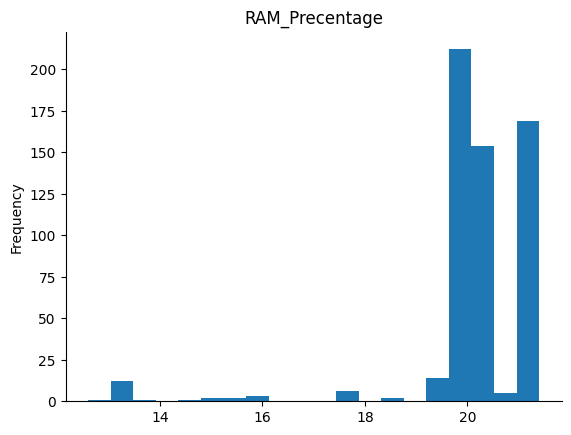

In [11]:
# @title RAM_Precentage

from matplotlib import pyplot as plt
newDF['RAM_Precentage'].plot(kind='hist', bins=20, title='RAM_Precentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

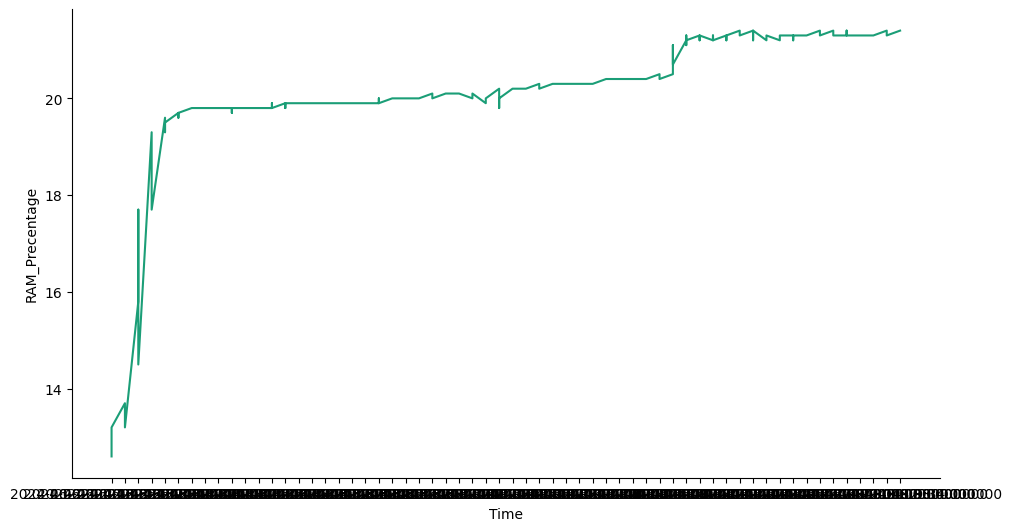

In [12]:
# @title Time vs RAM_Precentage

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['RAM_Precentage']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = newDF.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('RAM_Precentage')

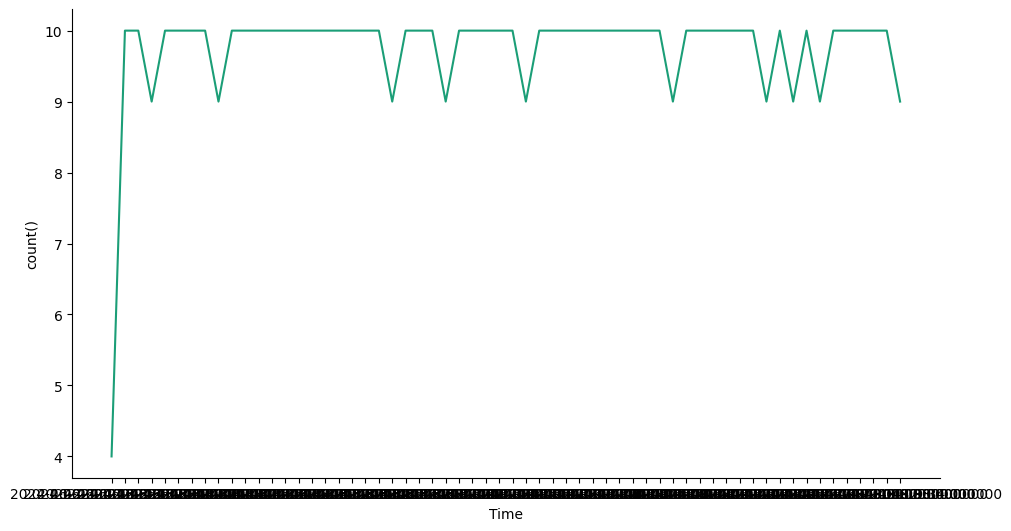

In [13]:
# @title Time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = newDF.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

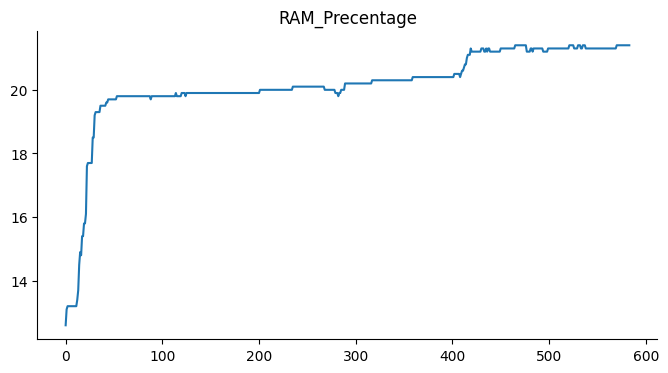

In [14]:
# @title RAM_Precentage

from matplotlib import pyplot as plt
newDF['RAM_Precentage'].plot(kind='line', figsize=(8, 4), title='RAM_Precentage')
plt.gca().spines[['top', 'right']].set_visible(False)